### Logistic and simple neural networks

We experimented with different combinations of tokenizers(BOWs, TF-IDF, Word2Vec, Embeddings) and models(Logistic Regression, Simple neural network, DistillbertSequenceClassifier).
1. Logistic regression model with (i) BOWs, (ii)TF-IDF, (iii) Word2Vec
2. Simple neural network with (i) BOWs, (ii)TF-IDF, (iii) Word2Vec


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
import plotly.express as px
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [4]:
df = pd.read_csv('train.tsv',sep='\t')
df.head()

,claim_id,claim,date_published,explanation,fact_checkers,main_text,sources,label,subjects
0,15661,"""The money the Clinton Foundation took from fr...","April 26, 2015","""Gingrich said the Clinton Foundation """"took m...",Katie Sanders,"""Hillary Clinton is in the political crosshair...",https://www.wsj.com/articles/clinton-foundatio...,false,"Foreign Policy, PunditFact, Newt Gingrich,"
1,9893,Annual Mammograms May Have More False-Positives,"October 18, 2011",This article reports on the results of a study...,,While the financial costs of screening mammogr...,,mixture,"Screening,WebMD,women's health"
2,11358,SBRT Offers Prostate Cancer Patients High Canc...,"September 28, 2016",This news release describes five-year outcomes...,"Mary Chris Jaklevic,Steven J. Atlas, MD, MPH,K...",The news release quotes lead researcher Robert...,https://www.healthnewsreview.org/wp-content/up...,mixture,"Association/Society news release,Cancer"
3,10166,"Study: Vaccine for Breast, Ovarian Cancer Has ...","November 8, 2011","While the story does many things well, the ove...",,"The story does discuss costs, but the framing ...",http://clinicaltrials.gov/ct2/results?term=can...,true,"Cancer,WebMD,women's health"
4,11276,Some appendicitis cases may not require ’emerg...,"September 20, 2010",We really don’t understand why only a handful ...,,"""Although the story didn’t cite the cost of ap...",,true,


In [ ]:
df = df[['claim','main_text','label']]
df.isna().sum()

,0
claim,8
main_text,26
label,27


In [ ]:
df.dropna(axis=0,inplace =True)
df['main_text'].value_counts()

,count
main_text,
"Doctors in India have been successful in treating coronavirus with a combination of drugs (Lopinavir, Retonovir, Oseltamivir along with Chlorphenamine) and are going to suggest the same medicine globally. India’s ministry of health has advised that the anti-HIV drugs, Lopinavir and Retonovir, are used in some groups of Covid-19 patients. But it is unclear how successful this treatment has been. The other two drugs from the claim are not mentioned in their guidance. Researchers at the Erasmus Medical Center claim to have found an antibody against coronavirus. Researchers in the Netherlands have released research, which has not yet been peer-reviewed, on an antibody against the new coronavirus. A 103 year-old Chinese grandmother has made a full recovery from Covid-19 after being treated for 6 days in Wuhan, China This has been widely reported in the media. Apple has reopened all 42 China stores. Correct. On 13 March 2020, Apple announced that it had reopened all 42 stores in mainland China after a closure of almost six weeks. Cleveland Clinic developed a Covid-19 test that gives results in hours, not days. The number of new cases in South Korea is declining. Italy is hit hard, experts say, only because they have the oldest population in Europe. Whilst it is true that an older population has contributed to a high number of deaths in Italy, it may not be the sole reason. Scientists in Israel are likely to announce the development of a coronavirus vaccine. Scientists in Israel and elsewhere are working on developing a vaccination to prevent the spread of the new coronavirus, but it won’t be ready for the public for over a year. Three Maryland coronavirus patients fully recovered and are able to return to everyday life. Correct. On 13 March 2020, Montgomery County, Maryland confirmed that three residents who previously had the virus no longer tested positive. A network of Canadian scientists are making excellent progress in Covid-19 research. At least one group of Canadian scientists has recently announced some progress in understanding Covid-19. A San Diego biotech company is developing a Covid-19 vaccine in collaboration with Duke University and National University of Singapore. Tulsa County's first positive Covid-19 case has recovered. This individual has had two negative tests, which is the indicator of recovery. Correct, this patient has recovered according to official Tulsa County sources. Two negative tests is one of three official indicators of recovery among people with Covid-19 (who showed symptoms). All seven patients who were getting treated for Covid-19 at Safdarjung hospital in New Delhi have recovered. There is a news story reporting that seven patients in this hospital in New Delhi had recovered. However, these were not the only Covid-19 patients in the city. Plasma from newly recovered patients from Covid -19 can treat others infected by Covid-19. This is being used as a treatment in some countries, but clinical trials have not yet proved that this is effective. Claim 1 of 15",12
"There are 16,481 fewer beds in hospitals since 2010. This is in the right ballpark, but it doesn’t seem to be the best comparison. It seems to compare the number of beds at different times of the year, but the number available fluctuates seasonally. Comparing July-September in 2010 and 2017, the decrease in beds available overnight in England is closer to 13,200. 66 A&E and maternity wards have been closed. We don’t know, as this information isn’t collected nationally. In 2014, there were reportedly plans to close or downgrade 66 in England, but while some have been, others have stayed open. 103 NHS walk-in centres have closed or been downgraded since 2010. We don’t know exactly, as this information isn’t collected centrally. Research from an NHS regulator and from campaign group 38 Degrees suggests more than 90 have been closed or downgraded. 60 ambulance stations have closed since 2010. We don’t know how many ambulance

### data preprocessing

In [ ]:
stop_words = set(stopwords.words('english'))

df['main_text'] = df['main_text'].apply(lambda x: re.sub(r'[#\\\"$”“,:()–’\'/;\[\]{}—‘!+•%&-]', ' ', x))
df['main_text'] = df['main_text'].apply(lambda x: re.sub(r'\s+', ' ', x))
df['main_text'] = df['main_text'].apply(lambda x: x.lower())
df['main_text'] = df['main_text'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word.lower() not in stop_words]))

df['claim'] = df['claim'].apply(lambda x: re.sub(r'[#\\\"$”“,:()–’\'/;\[\]{}—‘!+•%&-]',' ',x))
df['claim'] = df['claim'].apply(lambda x: re.sub(r'\s+',' ',x))
df['claim'] = df['claim'].apply(lambda x: x.lower())
df['claim'] = df['claim'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word.lower() not in stop_words]))


In [ ]:
df.head()

,claim,main_text,label
0,money clinton foundation took foreign governme...,hillary clinton political crosshairs author ne...,false
1,annual mammograms may false positives,financial costs screening mammography false po...,mixture
2,sbrt offers prostate cancer patients high canc...,news release quotes lead researcher robert mei...,mixture
3,study vaccine breast ovarian cancer potential,story discuss costs framing problematic . stor...,true
4,appendicitis cases may require emergency surgery,although story cite cost appendectomy emergenc...,true


In [ ]:
df['label'].value_counts()

,count
label,
true,5078
false,3001
mixture,1434
unproven,291
snopes,1


In [ ]:
df1 = df[~df['label'].isin(['snopes'])]
df1.shape,df.shape

((9804, 3), (9805, 3))

In [ ]:
n = len(set(df1['main_text']))
corpus = list(set(df1['main_text']))+list(set(df1['claim'])) # corpus to fit the vectorizer on

In [ ]:
len(corpus)

19385

### BOWs 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer # inbuilt function for BOWs

vectorizer = CountVectorizer(max_features=5000)
X = vectorizer.fit_transform(corpus)
len(vectorizer.get_feature_names_out())

5000

In [ ]:
X.toarray().shape

(19385, 5000)

In [ ]:
X.toarray()

array([[0, 3, 3, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
vectorizer.vocabulary_

{'legend': 2569,
 'good': 2020,
 'true': 4663,
 'lot': 2659,
 'really': 3677,
 'nice': 2989,
 'people': 3256,
 'end': 1584,
 'eventually': 1652,
 'hard': 2091,
 'work': 4955,
 'pretty': 3455,
 'much': 2915,
 'went': 4910,
 'pull': 3579,
 'special': 4209,
 'value': 4772,
 'makes': 2693,
 'time': 4562,
 'machines': 2675,
 'indeed': 2295,
 'make': 2690,
 'worth': 4968,
 'far': 1770,
 'excess': 1675,
 'ordinary': 3122,
 'metal': 2808,
 'handful': 2082,
 'concerns': 1029,
 'including': 2284,
 'mcdonald': 2756,
 'ronald': 3906,
 'house': 2187,
 'hospitals': 2179,
 'children': 865,
 'accept': 158,
 'donations': 1454,
 'said': 3939,
 'groups': 2053,
 'items': 2425,
 'later': 2534,
 'article': 440,
 'national': 2941,
 'kidney': 2483,
 'foundation': 1918,
 'says': 3968,
 'rumor': 3925,
 'quite': 3617,
 'false': 1762,
 'aluminum': 323,
 'industry': 2312,
 'decades': 1266,
 'recently': 3689,
 'perhaps': 3266,
 'fueled': 1947,
 'internet': 2379,
 'individuals': 2308,
 'believe': 597,
 'donate': 145

In [ ]:
doc_feat = vectorizer.transform(list(df1['main_text'])).toarray()
claim_feat = vectorizer.transform(list(df1['claim'])).toarray()
train_labels = df1['label']
# Map string labels to integers
label_mapping = {'true': 0, 'false': 1, 'mixture': 2,'unproven':3}
train_labels = train_labels.map(label_mapping)

In [ ]:
train_feat = np.hstack([doc_feat,claim_feat])
train_feat.shape

(9804, 10000)

In [ ]:
train_feat[0].shape

(10000,)

In [ ]:
train_labels.value_counts()

,count
label,
0,5078
1,3001
2,1434
3,291


### logistic regression with BOWs

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, f1_score,  recall_score

In [ ]:
x_train = train_feat
y_train = train_labels

logitmodel = LogisticRegression(random_state=42)
logitmodel.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [ ]:
df3 = pd.read_csv('test.tsv',sep='\t')
df3 = df3[['claim','main_text','label']]
df3.dropna(axis=0,inplace=True)
df3=df3[~df3['label'].isin(['snopes'])]

doc_feat = vectorizer.transform(list(df3['main_text'])).toarray()
claim_feat = vectorizer.transform(list(df3['claim'])).toarray()
test_labels = df3['label']
# Map string labels to integers
label_mapping = {'true': 0, 'false': 1, 'mixture': 2,'unproven':3}
test_labels = test_labels.map(label_mapping)

test_feat = np.hstack([doc_feat,claim_feat])
predictions = logitmodel.predict(test_feat)

In [ ]:
df3['label'].value_counts()

,count
label,
true,599
false,388
mixture,201
unproven,45


In [ ]:
predictions

array([3, 0, 3, ..., 3, 0, 3])

In [ ]:
accuracy = accuracy_score(test_labels, predictions)
macro_precision = precision_score(test_labels, predictions, average='macro')
macro_recall = recall_score(test_labels, predictions, average='macro')
f1 = f1_score(test_labels, predictions, average='weighted')

metrics = ['Accuracy', 'Macro Precision', 'Macro Recall', 'F1 Score']
values = [accuracy, macro_precision, macro_recall, f1]
fig = px.bar(x=metrics, y=values, text=np.round(values, 4),
             labels={'x': 'Metrics', 'y': 'Values'},
             title='Evaluation Metrics',
             template='plotly_white',
              color=values,
             color_continuous_scale='Viridis',
              color_continuous_midpoint=None
             )

fig.update_layout(yaxis=dict(range=[0, 1]))

fig.show()

Text(34.472222222222214, 0.5, 'Predicted Label')

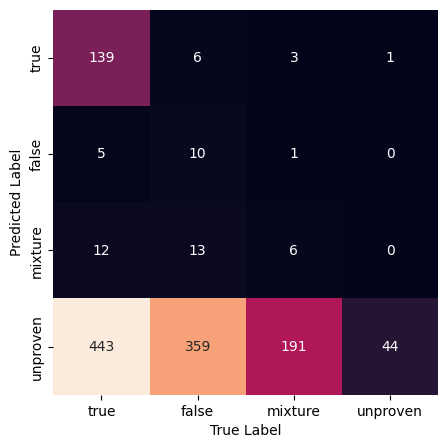

In [ ]:

class_labels = ['true','false','mixture','unproven']
mat = confusion_matrix(test_labels, predictions)
plt.figure(figsize=(5,5))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('True Label')
plt.ylabel('Predicted Label')

### Simple neural network with BOWs

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from torch import optim
import torch.nn.functional as F

In [ ]:
train_feat = torch.tensor(train_feat,dtype=torch.float32)
train_labels = torch.tensor(train_labels,dtype=torch.long)
train_dataset = TensorDataset(train_feat,train_labels)
train_loader = DataLoader(train_dataset,batch_size=32,shuffle=True)

In [ ]:
train_feat.shape[1]

10000

In [ ]:
# simple neural network
class bow_snn(nn.Module):
    def __init__(self):
        super(bow_snn,self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(10000,100),
            nn.ReLU(),
            nn.Linear(100,50),
            nn.ReLU(),
            nn.Linear(50,25),
            nn.ReLU(),
            nn.Linear(25,4),
            nn.Softmax(dim=1)
        )

    def forward(self,x):
        prob = self.layers(x)
        return prob

    def loss_fn(self,y,y_pred):
        log_pred = torch.log(y_pred+1e-8)
        loss = -(log_pred*y).sum(1).mean()
        return loss

In [ ]:
model=bow_snn()

In [ ]:
train_labels

tensor([1, 2, 2,  ..., 0, 1, 1])

In [ ]:
lr = 0.001 # this is our base learning rate
epochs = 50

optimizer = optim.Adam(model.parameters(), lr=lr)

# set model to training mode
model.train()

for epoch in range(epochs):
    for x_batch, y_batch in train_loader:

        y_batch = F.one_hot(y_batch, num_classes=4) # turn digit labels into one-hot vectors 5 -> (0,0,0,0,0,1,0,0,0,0)
        y_pred = model(x_batch) # this is from our forward function
        #print(f'y_batch :{y_batch},y_pred :{y_pred}')
        loss = model.loss_fn(y_batch, y_pred)

        loss.backward() # calculates the gradients using backpropogation
        optimizer.step() # take a gradient step for our parameters
        optimizer.zero_grad() # set gradients back to zero

    if epoch % 10 == 0:
        print('epoch: ', epoch, 'loss:', f"{loss.item():.3}")

epoch:  0 loss: 0.606
epoch:  10 loss: 0.0013
epoch:  20 loss: 0.0562
epoch:  30 loss: 0.00125
epoch:  40 loss: 8.99e-06


In [ ]:
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df3 = pd.read_csv('test.tsv',sep='\t')
df3 = df3[['claim','main_text','label']]
df3.dropna(axis=0,inplace=True)
df3=df3[~df3['label'].isin(['snopes'])]

doc_feat = vectorizer.transform(list(df3['main_text'])).toarray()
claim_feat = vectorizer.transform(list(df3['claim'])).toarray()
test_labels = df3['label']
# Map string labels to integers
label_mapping = {'true': 0, 'false': 1, 'mixture': 2,'unproven':3}
test_labels = test_labels.map(label_mapping)

test_feat = np.hstack([doc_feat,claim_feat])
test_feat = torch.tensor(test_feat,dtype=torch.float32)
test_labels = torch.tensor(test_labels,dtype=torch.long)

predictions = model(test_feat)
#predicted_labels = np.argmax(predictions, axis=1)
predicted_labels = np.argmax(predictions.detach().numpy(), axis=1)

In [ ]:
predictions

tensor([[2.7364e-16, 2.2739e-08, 2.2658e-12, 1.0000e+00],
        [2.5169e-01, 4.7629e-01, 2.2415e-01, 4.7861e-02],
        [2.1406e-04, 9.7274e-01, 1.0250e-02, 1.6799e-02],
        ...,
        [2.1986e-05, 9.9055e-01, 2.7161e-04, 9.1564e-03],
        [9.9980e-01, 1.2077e-04, 7.0264e-05, 7.5293e-06],
        [9.9999e-01, 9.1646e-16, 2.0757e-16, 5.3313e-06]],
       grad_fn=<SoftmaxBackward0>)

In [ ]:
df3['label'].value_counts()

,count
label,
true,599
false,388
mixture,201
unproven,45


In [ ]:
test_labels[:20]

tensor([1, 0, 0, 1, 3, 3, 0, 0, 2, 3, 0, 0, 1, 1, 0, 1, 2, 3, 0, 1])

In [ ]:
predicted_labels[:20]

array([3, 1, 1, 3, 3, 1, 0, 0, 3, 0, 2, 1, 3, 3, 0, 1, 2, 1, 0, 3])

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, f1_score,  recall_score

In [ ]:
accuracy = accuracy_score(test_labels, predicted_labels)
macro_precision = precision_score(test_labels, predicted_labels, average='macro')
macro_recall = recall_score(test_labels, predicted_labels, average='macro')
f1 = f1_score(test_labels, predicted_labels, average='weighted')

metrics = ['Accuracy', 'Macro Precision', 'Macro Recall', 'F1 Score']
values = [accuracy, macro_precision, macro_recall, f1]
fig = px.bar(x=metrics, y=values, text=np.round(values, 4),
             labels={'x': 'Metrics', 'y': 'Values'},
             title='Evaluation Metrics',
             template='plotly_white',
              color=values,
             color_continuous_scale='Viridis',
              color_continuous_midpoint=None
             )

fig.update_layout(yaxis=dict(range=[0, 1]))

fig.show()

Text(34.472222222222214, 0.5, 'Predicted Label')

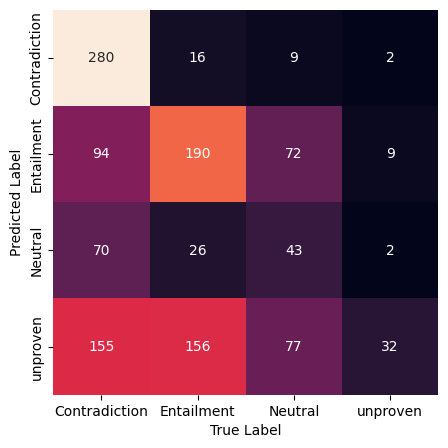

In [ ]:

class_labels = ['Contradiction','Entailment','Neutral','unproven']
mat = confusion_matrix(test_labels, predicted_labels)
plt.figure(figsize=(5,5))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('True Label')
plt.ylabel('Predicted Label')

### TFIDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=5000)
tfidf.fit(corpus)

In [ ]:
doc_tfidf = tfidf.transform(list(df1['main_text'])).toarray()
claim_tfidf = tfidf.transform(list(df1['claim'])).toarray()
train_labels = df1['label']
# Map string labels to integers
label_mapping = {'true': 0, 'false': 1, 'mixture': 2,'unproven':3}
train_labels = train_labels.map(label_mapping)

In [ ]:
train_tfidf = np.hstack([doc_tfidf,claim_tfidf])
test_feat = torch.tensor(test_feat,dtype=torch.float32)
test_labels = torch.tensor(test_labels,dtype=torch.long)
predictions = model(test_feat)
#predicted_labels = np.argmax(predictions, axis=1)
predicted_labels = np.argmax(predictions.detach().numpy(), axis=1)

## logistic with tfidf

In [ ]:
train_tfidf_feat = torch.tensor(train_tfidf,dtype=torch.float32)
train_labels = torch.tensor(train_labels,dtype=torch.long)
train_tfidf_dataset = TensorDataset(train_feat,train_labels)
train_tfidf_loader = DataLoader(train_dataset,batch_size=32,shuffle=True)

In [ ]:
logitmodel = LogisticRegression(random_state=42)
logitmodel.fit(train_tfidf_feat, train_labels)

LogisticRegression(random_state=42)

In [ ]:
doc_feat = tfidf.transform(list(df3['main_text'])).toarray()
claim_feat = tfidf.transform(list(df3['claim'])).toarray()
test_labels = df3['label']
# Map string labels to integers
label_mapping = {'true': 0, 'false': 1, 'mixture': 2,'unproven':3}
test_labels = test_labels.map(label_mapping)
test_tfidf_feat = np.hstack([doc_feat,claim_feat])

In [ ]:
tfidf_predictions = logitmodel.predict(test_tfidf_feat)

In [ ]:
accuracy = accuracy_score(test_labels, tfidf_predictions)
macro_precision = precision_score(test_labels, tfidf_predictions, average='macro')
macro_recall = recall_score(test_labels, tfidf_predictions, average='macro')
f1 = f1_score(test_labels, tfidf_predictions, average='weighted')

metrics = ['Accuracy', 'Macro Precision', 'Macro Recall', 'F1 Score']
values = [accuracy, macro_precision, macro_recall, f1]
fig = px.bar(x=metrics, y=values, text=np.round(values, 4),
             labels={'x': 'Metrics', 'y': 'Values'},
             title='Evaluation Metrics',
             template='plotly_white',
              color=values,
             color_continuous_scale='Viridis',
              color_continuous_midpoint=None
             )

fig.update_layout(yaxis=dict(range=[0, 1]))

fig.show()

### Simple neural networks with TFIDF

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
import plotly.express as px
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
# simple neural network
class tfidf_snn(nn.Module):
    def __init__(self):
        super(tfidf_snn,self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(10000,100),
            nn.ReLU(),
            nn.Linear(100,50),
            nn.ReLU(),
            nn.Linear(50,25),
            nn.ReLU(),
            nn.Linear(25,4),
            nn.Softmax(dim=1)
        )

    def forward(self,x):
        prob = self.layers(x)
        return prob

    def loss_fn(self,y,y_pred):
        log_pred = torch.log(y_pred+1e-8)
        loss = -(log_pred*y).sum(1).mean()
        return loss

In [ ]:
df = pd.read_csv('train.tsv',sep='\t')
df = df[['claim','main_text','label']]
df.dropna(axis=0,inplace =True)

stop_words = set(stopwords.words('english'))

df['main_text'] = df['main_text'].apply(lambda x: re.sub(r'[#\\\"$”“,:()–’\'/;\[\]{}—‘!+•%&-]', ' ', x))
df['main_text'] = df['main_text'].apply(lambda x: re.sub(r'\s+', ' ', x))
df['main_text'] = df['main_text'].apply(lambda x: x.lower())
df['main_text'] = df['main_text'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word.lower() not in stop_words]))

df['claim'] = df['claim'].apply(lambda x: re.sub(r'[#\\\"$”“,:()–’\'/;\[\]{}—‘!+•%&-]',' ',x))
df['claim'] = df['claim'].apply(lambda x: re.sub(r'\s+',' ',x))
df['claim'] = df['claim'].apply(lambda x: x.lower())
df['claim'] = df['claim'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word.lower() not in stop_words]))

df1 = df[~df['label'].isin(['snopes'])]
n = len(set(df1['main_text']))
corpus = list(set(df1['main_text']))+list(set(df1['claim'])) # corpus to fit the vectorizer on

<ipython-input-69-bcf7f82b0805>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=5000)

In [ ]:
tfidf.fit(corpus)

TfidfVectorizer(max_features=5000)

In [ ]:
len(tfidf.get_feature_names_out())

5000

In [ ]:
doc_tfidf = tfidf.transform(list(df1['main_text'])).toarray()
claim_tfidf = tfidf.transform(list(df1['claim'])).toarray()
train_labels = df1['label']
# Map string labels to integers
label_mapping = {'true': 0, 'false': 1, 'mixture': 2,'unproven':3}
train_labels = train_labels.map(label_mapping)

In [ ]:
train_tfidf = np.hstack([doc_tfidf,claim_tfidf])


In [ ]:
test_feat = torch.tensor(test_feat,dtype=torch.float32)
test_labels = torch.tensor(test_labels,dtype=torch.long)
predictions = model(test_feat)
#predicted_labels = np.argmax(predictions, axis=1)
predicted_labels = np.argmax(predictions.detach().numpy(), axis=1)

<ipython-input-68-a2d71096165e>:1: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



In [ ]:
model=tfidf_snn()

In [ ]:
lr = 0.001 # this is our base learning rate
epochs = 20

optimizer = optim.Adam(model.parameters(), lr=lr)

# set model to training mode
model.train()

for epoch in range(epochs):
    for x_batch, y_batch in train_tfidf_loader:

        y_batch = F.one_hot(y_batch, num_classes=4) # turn digit labels into one-hot vectors 5 -> (0,0,0,0,0,1,0,0,0,0)
        y_pred = model(x_batch) # this is from our forward function
        #print(f'y_batch :{y_batch},y_pred :{y_pred}')
        loss = model.loss_fn(y_batch, y_pred)

        loss.backward() # calculates the gradients using backpropogation
        optimizer.step() # take a gradient step for our parameters
        optimizer.zero_grad() # set gradients back to zero

    if epoch % 1 == 0:
        print('epoch: ', epoch, 'loss:', f"{loss.item():.3}")

epoch:  0 loss: 0.859
epoch:  1 loss: 0.942
epoch:  2 loss: 0.567
epoch:  3 loss: 0.148
epoch:  4 loss: 0.0248
epoch:  5 loss: 0.0129
epoch:  6 loss: 0.00156
epoch:  7 loss: 0.00135
epoch:  8 loss: 0.00387
epoch:  9 loss: 0.00641
epoch:  10 loss: 0.000512
epoch:  11 loss: 0.00307
epoch:  12 loss: 0.203
epoch:  13 loss: 0.00013
epoch:  14 loss: 0.0296
epoch:  15 loss: 0.137
epoch:  16 loss: 0.000463
epoch:  17 loss: 6.98e-06
epoch:  18 loss: 0.00132
epoch:  19 loss: 0.0011


In [ ]:
df3 = pd.read_csv('test.tsv',sep='\t')
df3 = df3[['claim','main_text','label']]
df3.dropna(axis=0,inplace=True)
df3=df3[~df3['label'].isin(['snopes'])]

In [ ]:
doc_feat = tfidf.transform(list(df3['main_text'])).toarray()
claim_feat = tfidf.transform(list(df3['claim'])).toarray()
test_labels = df3['label']
# Map string labels to integers
label_mapping = {'true': 0, 'false': 1, 'mixture': 2,'unproven':3}
test_labels = test_labels.map(label_mapping)
test_tfidf_feat = np.hstack([doc_feat,claim_feat])

In [ ]:
model.eval()
test_feat = torch.tensor(test_feat,dtype=torch.float32)
test_labels = torch.tensor(test_labels,dtype=torch.long)
predictions = model(test_feat)
#predicted_labels = np.argmax(predictions, axis=1)
predicted_labels = np.argmax(predictions.detach().numpy(), axis=1)

<ipython-input-114-970f53726495>:2: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



In [ ]:
accuracy = accuracy_score(test_labels, predicted_labels)
macro_precision = precision_score(test_labels, predicted_labels, average='macro')
macro_recall = recall_score(test_labels, predicted_labels, average='macro')
f1 = f1_score(test_labels, predicted_labels, average='weighted')

metrics = ['Accuracy', 'Macro Precision', 'Macro Recall', 'F1 Score']
values = [accuracy, macro_precision, macro_recall, f1]
fig = px.bar(x=metrics, y=values, text=np.round(values, 4),
             labels={'x': 'Metrics', 'y': 'Values'},
             title='Evaluation Metrics',
             template='plotly_white',
              color=values,
             color_continuous_scale='Viridis',
              color_continuous_midpoint=None
             )

fig.update_layout(yaxis=dict(range=[0, 1]))

fig.show()

Text(34.472222222222214, 0.5, 'Predicted Label')

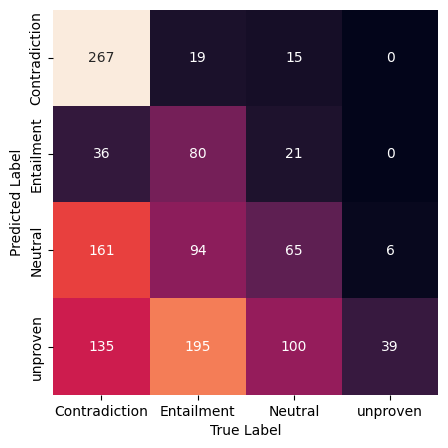

In [ ]:
class_labels = ['Contradiction','Entailment','Neutral','unproven']
mat = confusion_matrix(test_labels, predicted_labels)
plt.figure(figsize=(5,5))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('True Label')
plt.ylabel('Predicted Label')

### word2vec 

In [ ]:
from gensim.models import Word2Vec

sentences = [sentence.split() for sentence in corpus]
w2v_model = Word2Vec(sentences,  vector_size=300, window=5, min_count=5, workers=4)

In [ ]:
def vectorize(sentence):
    words = sentence.split()
    words_vecs = [w2v_model.wv[word] for word in words if word in w2v_model.wv]
    if len(words_vecs) == 0:
        return np.zeros(300)
    words_vecs = np.array(words_vecs)
    return words_vecs.mean(axis=0)

#X_train = np.array([vectorize(sentence) for sentence in X_train])
#X_test = np.array([vectorize(sentence) for sentence in X_test])

In [ ]:
#doc_tfidf = tfidf.transform(list(df1['main_text'])).toarray()
doc_word2vec = np.array([vectorize(sentence) for sentence in df1['main_text']])
#claim_tfidf = tfidf.transform(list(df1['claim'])).toarray()
claim_word2vec = np.array([vectorize(sentence) for sentence in df1['claim']])
train_labels = df1['label']
# Map string labels to integers
label_mapping = {'true': 0, 'false': 1, 'mixture': 2,'unproven':3}
train_labels = train_labels.map(label_mapping)

In [ ]:
claim_word2vec.shape

(9804, 200)

In [ ]:
train_feat_word2vec = np.hstack([doc_word2vec,claim_word2vec])
train_feat_word2vec.shape

(9804, 600)

#### word2vec with logistic

In [ ]:
word2vec_clf = LogisticRegression()
word2vec_clf.fit(train_feat_word2vec, train_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [ ]:
#doc_tfidf = tfidf.transform(list(df1['main_text'])).toarray()
test_doc_word2vec = np.array([vectorize(sentence) for sentence in df3['main_text']])
#claim_tfidf = tfidf.transform(list(df1['claim'])).toarray()
test_claim_word2vec = np.array([vectorize(sentence) for sentence in df3['claim']])
test_labels = df3['label']
# Map string labels to integers
label_mapping = {'true': 0, 'false': 1, 'mixture': 2,'unproven':3}
test_labels = test_labels.map(label_mapping)

In [ ]:
test_feat_word2vec = np.hstack([test_doc_word2vec,test_claim_word2vec])
test_feat_word2vec.shape

(1233, 600)

In [ ]:
word2vec_pred = word2vec_clf.predict(test_feat_word2vec)

In [ ]:
word2vec_pred

array([3, 0, 0, ..., 1, 0, 0])

In [ ]:
accuracy = accuracy_score(test_labels, word2vec_pred)
macro_precision = precision_score(test_labels,word2vec_pred, average='macro')
macro_recall = recall_score(test_labels, word2vec_pred, average='macro')
f1 = f1_score(test_labels, word2vec_pred, average='weighted')

metrics = ['Accuracy', 'Macro Precision', 'Macro Recall', 'F1 Score']
values = [accuracy, macro_precision, macro_recall, f1]
fig = px.bar(x=metrics, y=values, text=np.round(values, 4),
             labels={'x': 'Metrics', 'y': 'Values'},
             title='Evaluation Metrics',
             template='plotly_white',
              color=values,
             color_continuous_scale='Viridis',
              color_continuous_midpoint=None
             )

fig.update_layout(yaxis=dict(range=[0, 1]))

fig.show()

### Word2Vec snn

In [ ]:

class word2vec_snn(nn.Module):
    def __init__(self):
        super(word2vec_snn,self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(600,100),
            nn.ReLU(),
            nn.Linear(100,50),
            nn.ReLU(),
            nn.Linear(50,25),
            nn.ReLU(),
            nn.Linear(25,4),
            nn.Softmax(dim=1)
        )

    def forward(self,x):
        prob = self.layers(x)
        return prob

    def loss_fn(self,y,y_pred):
        log_pred = torch.log(y_pred+1e-8)
        loss = -(log_pred*y).sum(1).mean()
        return loss

In [ ]:
word2vec_mod = word2vec_snn()

In [ ]:
train_word2vec_feat = torch.tensor(train_feat_word2vec,dtype=torch.float32)
train_labels = torch.tensor(train_labels,dtype=torch.long)
train_word2vec_dataset = TensorDataset(train_word2vec_feat,train_labels)
train_word2vec_loader = DataLoader(train_word2vec_dataset,batch_size=32,shuffle=True)

In [ ]:
train_feat_word2vec.shape

(9804, 600)

In [ ]:
lr = 0.001 # this is our base learning rate
epochs = 20

optimizer = optim.Adam(word2vec_mod.parameters(), lr=lr)

# set model to training mode
word2vec_mod.train()

for epoch in range(epochs):
    for x_batch, y_batch in train_word2vec_loader:

        y_batch = F.one_hot(y_batch, num_classes=4) # turn digit labels into one-hot vectors 5 -> (0,0,0,0,0,1,0,0,0,0)
        y_pred = word2vec_mod(x_batch) # this is from our forward function
        #print(f'y_batch :{y_batch},y_pred :{y_pred}')
        loss = word2vec_mod.loss_fn(y_batch, y_pred)

        loss.backward() # calculates the gradients using backpropogation
        optimizer.step() # take a gradient step for our parameters
        optimizer.zero_grad() # set gradients back to zero

    if epoch % 1 == 0:
        print('epoch: ', epoch, 'loss:', f"{loss.item():.3}")

epoch:  0 loss: 0.928
epoch:  1 loss: 0.671
epoch:  2 loss: 0.669
epoch:  3 loss: 0.778
epoch:  4 loss: 0.57
epoch:  5 loss: 0.269
epoch:  6 loss: 0.594
epoch:  7 loss: 0.85
epoch:  8 loss: 1.07
epoch:  9 loss: 0.801
epoch:  10 loss: 0.39
epoch:  11 loss: 0.844
epoch:  12 loss: 0.843
epoch:  13 loss: 0.507
epoch:  14 loss: 0.214
epoch:  15 loss: 0.511
epoch:  16 loss: 0.605
epoch:  17 loss: 0.279
epoch:  18 loss: 0.53
epoch:  19 loss: 0.23


In [ ]:

test_word2vec_feat = torch.tensor(test_feat_word2vec,dtype=torch.float32)
test_word2vec_labels = torch.tensor(test_labels,dtype=torch.long)
word2vec_mod.eval()
predictions = word2vec_mod(test_word2vec_feat)
#predicted_labels = np.argmax(predictions, axis=1)
predicted_labels = np.argmax(predictions.detach().numpy(), axis=1)

In [ ]:
predicted_labels

array([2, 0, 1, ..., 1, 0, 0])

In [ ]:
accuracy = accuracy_score(test_labels, predicted_labels)
macro_precision = precision_score(test_labels, predicted_labels, average='macro')
macro_recall = recall_score(test_labels, predicted_labels, average='macro')
f1 = f1_score(test_labels, predicted_labels, average='weighted')

metrics = ['Accuracy', 'Macro Precision', 'Macro Recall', 'F1 Score']
values = [accuracy, macro_precision, macro_recall, f1]
fig = px.bar(x=metrics, y=values, text=np.round(values, 4),
             labels={'x': 'Metrics', 'y': 'Values'},
             title='Evaluation Metrics',
             template='plotly_white',
              color=values,
             color_continuous_scale='Viridis',
              color_continuous_midpoint=None
             )

fig.update_layout(yaxis=dict(range=[0, 1]))

fig.show()